# Principal Component Analysis (PCA) Implementation

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 1) Load the dataset

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer_dataset = load_breast_cancer()

In [5]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
df = pd.DataFrame(cancer_dataset['data'], columns=cancer_dataset['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2) Apply Standardization

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [10]:
scaler.fit(df)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [11]:
scaled_data = scaler.transform(df)

In [13]:
scaled_data[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

## 3. Applying PCA algorithms

In [14]:
from sklearn.decomposition import PCA

In [21]:
pca_model = PCA(n_components=2)
data_pca = pca_model.fit_transform(scaled_data)
print(f"Example: {data_pca[:1]}")
print(f"Explanied Variance: {pca_model.explained_variance_}")

Example: [[9.19283683 1.94858307]]
Explanied Variance: [13.30499079  5.7013746 ]


C:\Users\francisco.bneto\AppData\Local\Temp\ipykernel_30432\2640372854.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


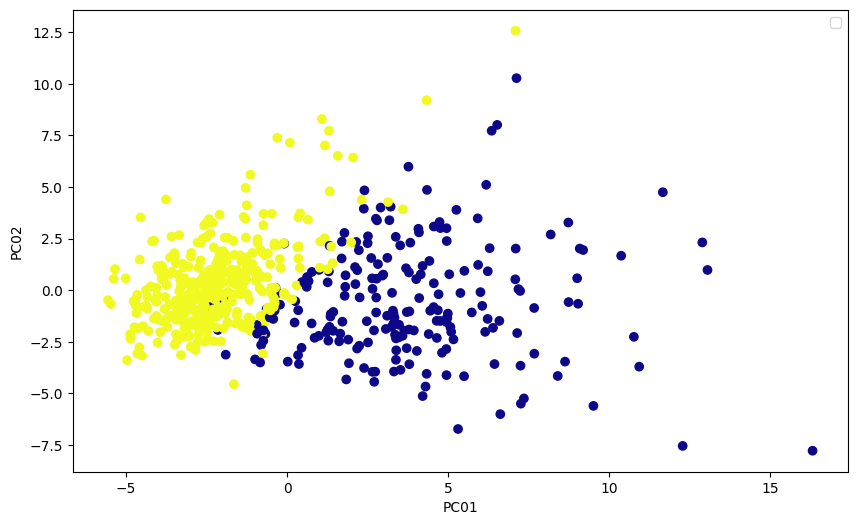

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cancer_dataset['target'], cmap="plasma")
plt.xlabel("PC01")
plt.ylabel("PC02")

plt.legend()

plt.show()

In [20]:
pca_model = PCA()
data_pca = pca_model.fit_transform(scaled_data)
print(f"Example: {data_pca[:1]}")
print(f"Explanied Variance: {pca_model.explained_variance_}")

Example: [[ 9.19283683  1.94858307 -1.12316616 -3.6337309   1.19511012  1.41142445
   2.15936987 -0.39840723 -0.15711836 -0.87740188  0.26295546  0.85901448
  -0.10338766 -0.6908041   0.60179313 -0.74511579 -0.26547078 -0.54956269
  -0.1337675   0.3455649  -0.09651489 -0.06884992 -0.08451859 -0.17525628
  -0.15102006  0.20150345 -0.25258499  0.03391445 -0.04564772  0.04716921]]
Explanied Variance: [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]


array([13.30499079,  5.7013746 ])